# Corpus Analysis for Old Bailey Data

First import necessary packages - spacy is for nlp analysis, pandas and matplotlib for data analysis and visdaulisation

In [1]:
import spacy
import pandas as pd
import matplotlib as plt
%matplotlib inline
import time
nlp=spacy.load('en')
from collections import defaultdict
import operator,math
from gensim.models import Word2Vec

The corpus class loads in, stores and performs basic nlp analysis on a corpus.  The data structures generated during basic analysis can be accessed for further analysis and visualisation.

In [2]:
class corpus:
    
    def __init__(self,ipfiles,nlpmodel,prop=10):
        #default mode is to load in 10%.  Set prop = 100 to load in whole corpus
        self.sourcefiles=ipfiles
        self.nlp=nlpmodel
        self.prop=prop
        self.name=""
        self.docs=[]
        self.worddict=defaultdict(int)
        self.noundict=defaultdict(int)
        self.verbdict=defaultdict(int)
        self.adjdict=defaultdict(int)
        self.advdict=defaultdict(int)
        self.wordlengths=defaultdict(int)
        self.sentencelengths=defaultdict(int)
        self.doclengths=defaultdict(int)
        self.sentences=[]

        self.wordtotal=0
        self.nountotal=0
        self.verbtotal=0
        self.adjtotal=0
        self.advtotal=0
        
        self.initialise()
        self.basic_analyse_all()
        
    def initialise(self):
        print("Loading sourcefiles")
        for ipf in self.sourcefiles:
            with open(ipf) as input:
                self.name+="_"+ipf
                for line in input:
                    self.docs.append(line)
                
       
    
    def basic_analyse_all(self):
            
        print("Running basic analysis")
        todo=len(self.docs)
        tenpercent=todo//10
        #print("Ten percent is {}".format(tenpercent))
        self.count=0        
        for doc in self.docs:
            self.basic_analyse_single(doc)
            if self.count%tenpercent==0:
                done=round(self.count*100/todo)
                print("Completed {} docs ({}% complete)".format(str(self.count),str(done)))
                if done >= self.prop:
                    break
                
        print("Number of documents is {}".format(self.count))
        print("Distribution of document lengths is {}".format(str(self.doclengths)))
        print("Distribution of sentence lengths is {}".format(str(self.sentencelengths)))
        print("Distribution of word lengths is {}".format(str(self.wordlengths)))
        #print("Number of docs with 1 sentence is {}".format(self.doclengths[1]))
        
    def basic_analyse_single(self,doc):
        
        self.count+=1
        nlpdoc=nlp(doc)
        nosents=0
        for sent in nlpdoc.sents:
            sent_text=[]
            slength=len(sent)
            #if slength>500:
            #    print(sent)
            self.sentencelengths[slength]+=1
            nosents+=1
            for token in sent:
                
                wordlength=len(token)
                self.wordlengths[wordlength]+=1
                self.wordtotal+=1
                
                if not token.is_stop and not token.is_oov and not token.pos_=="PUNCT":
                    self.worddict[token.lemma_]+=1
                    sent_text.append(token.lemma_)
                    if token.pos_ =="NOUN":
                        self.noundict[token.lemma_]+=1
                        self.nountotal+=1
                    elif token.pos_=="VERB":
                        self.verbdict[token.lemma_]+=1
                        self.verbtotal+=1
                    elif token.pos_=="ADJ":
                        self.adjdict[token.lemma_]+=1
                        self.adjtotal+=1
                    elif token.pos_=="ADV":
                        self.advdict[token.lemma_]+=1
                        self.advtotal+=1
                
            self.sentences.append(sent_text)
        #print("Number of sentences is {}".format(nosents))
        self.doclengths[nosents]+=1
        
    def get_word_distribution(self,wordtype):
        
        if wordtype=="NOUN":
            return(self.noundict,self.nountotal)
        elif wordtype=="VERB":
            return(self.verbdict,self.verbtotal)
        elif wordtype=="ADJ":
            return(self.adjdict,self.adjtotal)
        elif wordtype=="ADV":
            return(self.advdict,self.advtotal)
        else:
            return(self.worddict,self.wordtotal)

    def get_sentences(self):
        for sent in self.sentences:
            yield sent
            
            



Construct the corpus object for female witnesses

In [3]:
inputfiles=['corpus_f_wv']
start=time.time()
female_witness_corpus=corpus(inputfiles,spacy.load('en'),prop=100)
end=time.time()
print("Time taken: {}s".format(end-start))

Loading sourcefiles
Running basic analysis
Completed 2371 docs (10% complete)
Completed 4742 docs (20% complete)
Completed 7113 docs (30% complete)
Completed 9484 docs (40% complete)
Completed 11855 docs (50% complete)
Completed 14226 docs (60% complete)
Completed 16597 docs (70% complete)
Completed 18968 docs (80% complete)
Completed 21339 docs (90% complete)
Completed 23710 docs (100% complete)
Number of documents is 23710
Distribution of document lengths is defaultdict(<class 'int'>, {5: 403, 2: 4161, 1: 16270, 8: 102, 12: 24, 3: 1459, 4: 706, 9: 72, 6: 217, 7: 147, 17: 9, 10: 36, 16: 9, 14: 12, 13: 21, 21: 3, 20: 3, 23: 1, 11: 34, 22: 5, 19: 3, 15: 8, 25: 1, 18: 2, 44: 1, 27: 1})
Distribution of sentence lengths is defaultdict(<class 'int'>, {7: 1536, 25: 493, 11: 1178, 20: 704, 43: 210, 3: 2032, 67: 98, 9: 1327, 26: 460, 130: 36, 8: 1546, 16: 969, 14: 1087, 19: 824, 22: 642, 2: 329, 15: 1000, 42: 225, 63: 119, 35: 307, 17: 952, 70: 112, 18: 879, 4: 671, 39: 268, 60: 119, 13: 1118,

Build corpus object for male witnesses

In [4]:
inputfiles=['corpus_m_wv']
start=time.time()
male_witness_corpus=corpus(inputfiles,spacy.load('en'),prop=100)
end=time.time()
print("Time taken: {}s".format(end-start))

Loading sourcefiles
Running basic analysis
Completed 10763 docs (10% complete)
Completed 21526 docs (20% complete)
Completed 32289 docs (30% complete)
Completed 43052 docs (40% complete)
Completed 53815 docs (50% complete)
Completed 64578 docs (60% complete)
Completed 75341 docs (70% complete)
Completed 86104 docs (80% complete)
Completed 96867 docs (90% complete)
Completed 107630 docs (100% complete)
Number of documents is 107630
Distribution of document lengths is defaultdict(<class 'int'>, {2: 19173, 1: 72977, 4: 3287, 12: 124, 6: 1077, 3: 6706, 8: 507, 13: 94, 9: 355, 5: 1806, 7: 721, 10: 220, 14: 76, 11: 183, 15: 64, 16: 44, 25: 14, 19: 31, 22: 14, 18: 39, 20: 16, 29: 5, 26: 5, 17: 24, 23: 14, 27: 5, 21: 10, 30: 4, 28: 6, 44: 1, 32: 2, 24: 6, 42: 1, 35: 2, 45: 1, 31: 2, 80: 1, 38: 1, 198: 1, 49: 1, 65: 1, 43: 2, 48: 1, 34: 1, 66: 1, 83: 1, 73: 1, 47: 2})
Distribution of sentence lengths is defaultdict(<class 'int'>, {17: 4068, 36: 1450, 13: 5154, 6: 5623, 15: 4603, 3: 7948, 7: 658

## Testing SpaCy
In this section, we play with some of the spacy features on a single document.

In [5]:
mycorpus=female_witness_corpus
adoc=mycorpus.docs[0]
print(adoc)

I am servant to Mr. Elwell. I was down in the kitchen; my mistress called me up and sent me for some vinegar; I went for the vinegar. I found the door open and I left it open. The door generally stands open at that hour of the day; it was between two and three o'clock. When I came back I left the vinegar in the parlour and took the meat down stairs; when I came down into the kitchen I saw somebody lying down; I asked who the devil was there to frighten me!



In [6]:
doc1=nlp(adoc)

In [7]:
for token in doc1:
    print(token)
    
print("Number of tokens is {}".format(len(doc1)))

I
am
servant
to
Mr.
Elwell
.
I
was
down
in
the
kitchen
;
my
mistress
called
me
up
and
sent
me
for
some
vinegar
;
I
went
for
the
vinegar
.
I
found
the
door
open
and
I
left
it
open
.
The
door
generally
stands
open
at
that
hour
of
the
day
;
it
was
between
two
and
three
o'clock
.
When
I
came
back
I
left
the
vinegar
in
the
parlour
and
took
the
meat
down
stairs
;
when
I
came
down
into
the
kitchen
I
saw
somebody
lying
down
;
I
asked
who
the
devil
was
there
to
frighten
me
!


Number of tokens is 106


In [8]:
nosents=0

for sent in doc1.sents:
    print(sent)
    print(len(sent))
    nosents+=1
    
print("Number of sentences is {}".format(nosents))


I am servant to Mr. Elwell.
7
I was down in the kitchen; my mistress called me up and sent me for some vinegar; I went for the vinegar.
25
I found the door open and I left it open.
11
The door generally stands open at that hour of the day; it was between two and three o'clock.
20
When I came back I left the vinegar in the parlour and took the meat down stairs; when I came down into the kitchen I saw somebody lying down; I asked who the devil was there to frighten me!

43
Number of sentences is 5


In [9]:
print("{}\t{}\t\t{}\t\t{}\t{}\t{}\t{}\t{}\t{}".format("id","text","lemma","pos","stop","oov","ner","dep","head"))
for token in doc1: 
    if len(token.text)<8:
        print("{}\t{}\t\t{}\t\t{}\t{}\t{}\t{}\t{}\t{}".format(token.i,token.text,token.lemma_,token.pos_,token.is_stop,token.is_oov,token.ent_type_,token.dep_,token.head.i))
    else:
        print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format(token.i,token.text,token.lemma_,token.pos_,token.is_stop,token.is_oov,token.ent_type_,token.dep_,token.head.i))
    

id	text		lemma		pos	stop	oov	ner	dep	head
0	I		-PRON-		PRON	True	False		nsubj	1
1	am		be		VERB	True	False		ROOT	1
2	servant		servant		NOUN	False	False		attr	1
3	to		to		ADP	True	False		prep	2
4	Mr.		mr.		PROPN	False	False		compound	5
5	Elwell		elwell		PROPN	False	False	PERSON	pobj	3
6	.		.		PUNCT	False	False		punct	1
7	I		-PRON-		PRON	True	False		nsubj	8
8	was		be		VERB	True	False		ccomp	16
9	down		down		ADV	True	False		advmod	8
10	in		in		ADP	True	False		prep	9
11	the		the		DET	True	False		det	12
12	kitchen		kitchen		NOUN	False	False		pobj	10
13	;		;		PUNCT	False	False		punct	16
14	my		-PRON-		ADJ	True	False		poss	15
15	mistress	mistress	NOUN	False	False		nsubj	16
16	called		call		VERB	False	False		ccomp	27
17	me		-PRON-		PRON	True	False		dobj	16
18	up		up		PART	True	False		prt	16
19	and		and		CCONJ	True	False		cc	16
20	sent		send		VERB	False	False		conj	16
21	me		-PRON-		PRON	True	False		dobj	20
22	for		for		ADP	True	False		prep	20
23	some		some		DET	True	False		det	24
24	vinegar		vi

## Summary Stats

Computation of summary statistics from a frequency table (e.g., corpus.sentencelengths, corpus.doclengths or corpus.wordlengths

In [10]:
import math

def summarise(freqtable_dict):
    
    sumf=0
    sumxf=0
    sumxxf=0
    for key in freqtable_dict.keys():
        sumf+=freqtable_dict[key]
        sumxf+=freqtable_dict[key]*key
        sumxxf+=freqtable_dict[key]*key*key
        
    mean=sumxf/sumf
    var = sumxxf/sumf-mean*mean
    sd=math.sqrt(var)
    
    print("Mean is {} and sd is {}".format(str(mean),str(sd)))
    return(mean,sd)
    
summarise(mycorpus.doclengths)

Mean is 1.6840151834668915 and sd is 1.6147339540909058


(1.6840151834668915, 1.6147339540909058)

## Visualisation

Visualising the frequency tables.
The distributions are very skewed (and have a very long upper tail)  The squash function bins together data items in the tail for easier visalisation of the m,ain part of the distribution

In [11]:
def squash(afreqdict,m,sd):
    
    bmax=0
    threshold=math.ceil(m+sd)
    
    count=0
    bfreqdict=defaultdict(int)
    print("Threshold for inclusion in bar chart is {}".format(threshold))
    for (key,value) in afreqdict.items():
        #print(key)
        #print(type(key))
        if key>threshold:
            count+=value
        else:
            bfreqdict[key]=value
            
        if key > bmax:
            bmax=key
    #print(count)
    label=threshold
    bfreqdict[label]=count
    return bfreqdict



Mean is 1.6840151834668915 and sd is 1.6147339540909058
Threshold for inclusion in bar chart is 4


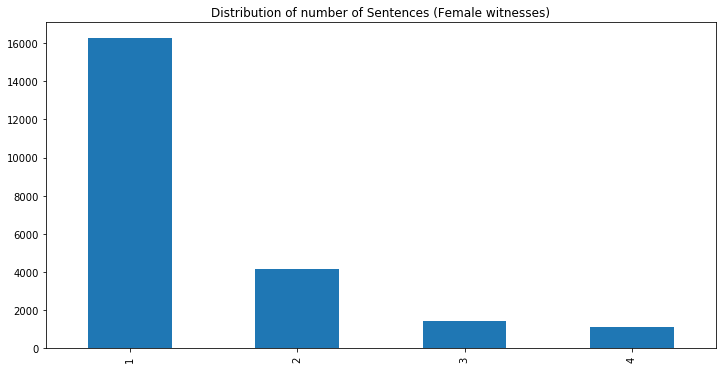

In [12]:
def visualise(afreqdict,heading='',makesquash=True):

    (m,sd)=summarise(afreqdict)
    if makesquash:
        bfreqdict=squash(afreqdict,m,sd)
    else:
        bfreqdict=afreqdict
    docsdata = pd.DataFrame.from_dict(bfreqdict,orient='index')
    docsdata.sort_index(inplace=True)
    docsdata.plot.bar(title='Distribution of number of '+heading,legend=False,figsize=(12,6))
    return docsdata

docsdata=visualise(female_witness_corpus.doclengths,heading='Sentences (Female witnesses)')

Mean is 1.7404255319148936 and sd is 1.9682465085952527
Threshold for inclusion in bar chart is 4


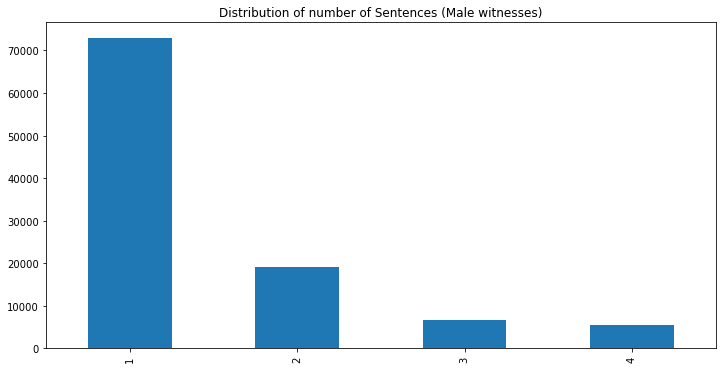

In [13]:
maledocsdata=visualise(male_witness_corpus.doclengths,heading='Sentences (Male witnesses)')

Mean is 44.61312863153677 and sd is 73.38798033146928
Threshold for inclusion in bar chart is 119


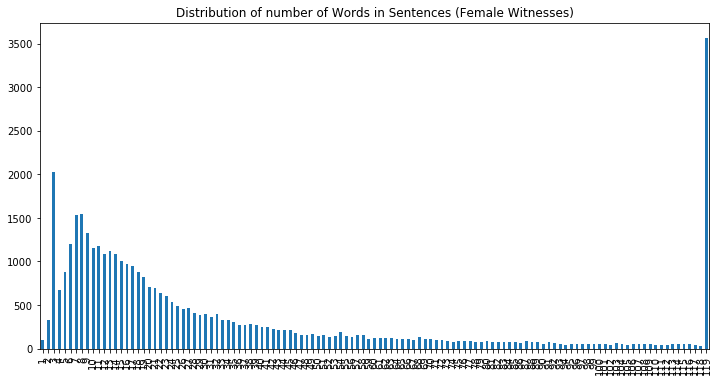

In [14]:
sentencedata=visualise(female_witness_corpus.sentencelengths,heading='Words in Sentences (Female Witnesses)')

Mean is 43.10307385144297 and sd is 71.0115834553726
Threshold for inclusion in bar chart is 115


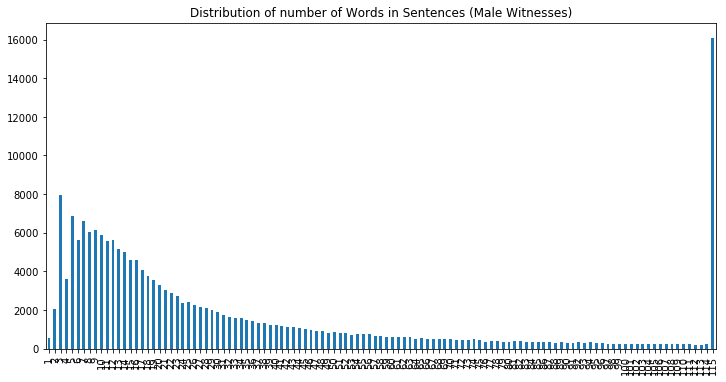

In [15]:
malesentencedata=visualise(male_witness_corpus.sentencelengths,heading='Words in Sentences (Male Witnesses)')

Mean is 3.344749069927632 and sd is 2.0832447179591598


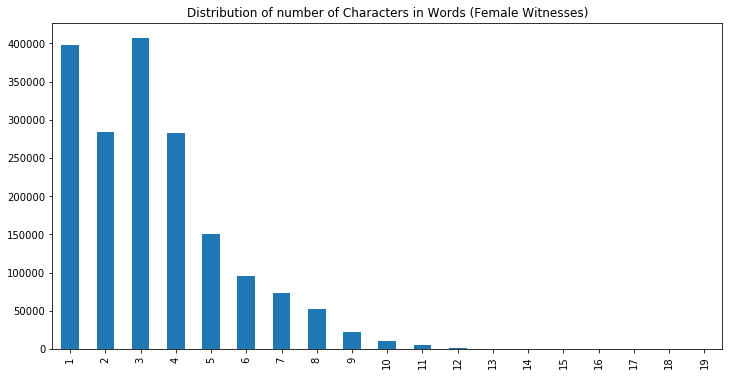

In [16]:
wordlengthdata=visualise(female_witness_corpus.wordlengths,heading="Characters in Words (Female Witnesses)",makesquash=False)

Mean is 3.420407141107291 and sd is 2.195359979745621


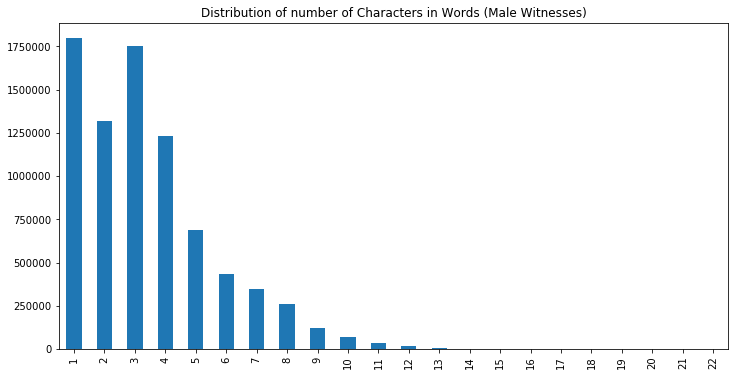

In [17]:
malewordlengthdata=visualise(male_witness_corpus.wordlengths,heading="Characters in Words (Male Witnesses)",makesquash=False)

## Popular Words

Find words (possibly of given part of speech) which are most common in a given corpus.  Then find the ones which are 'most surprising' given a second comparative corpus.

In [74]:
#import operator

def find_most_common_words(corpus1,wordtype,n=10):

    (dist1,_)=corpus1.get_word_distribution(wordtype)
    dc_sort = sorted(dist1.items(),key = operator.itemgetter(1),reverse = True)
    return dc_sort[0:n]

corpus=female_witness_corpus
wordtype="ADJ"
print("Most common {}s in {}:{}".format(wordtype,corpus.name,find_most_common_words(corpus,wordtype)))


Most common ADJs in _corpus_f_wv:[('bad', 1765), ('little', 1486), ('good', 1341), ('open', 1091), ('sure', 1051), ('half', 901), ('young', 844), ('past', 697), ('great', 675), ('old', 650)]


In [75]:
corpus=male_witness_corpus
print("Most common {}s in {}:{}".format(wordtype,corpus.name,find_most_common_words(corpus,wordtype)))


Most common ADJs in _corpus_m_wv:[('good', 5306), ('bad', 4477), ('little', 4112), ('great', 3360), ('sure', 3011), ('public', 2868), ('half', 2667), ('open', 2659), ('past', 2507), ('right', 2392)]


In [24]:
def find_surprising_words(corpus1,corpus2,wordtype,n=10,shift=0.25):
    #will find words which are surprisingly frequent in dist1 given dist2
    
    
    (dist1,total1)=corpus1.get_word_distribution(wordtype)
    (dist2,total2)=corpus2.get_word_distribution(wordtype)
    
    candidates={}
   
    
    for(key,value) in dist1.items():
        if value>0:
            p1=value/total1
            p2=(dist2[key]+0.1)/(total2+0.1)
            #p2=(dist2[key]+value)/(total2+total1)
            
            llr=math.log(p1/p2)
        
            if llr>0:
                
                llr=(1-shift)*llr+math.log(p1)
                candidates[key]=llr

       
    dc_sort=sorted(candidates.items(),key=operator.itemgetter(1),reverse=True)
    freqs=[(key,dist1[key]) for (key,_) in dc_sort[0:n]]
    
    return freqs
   
surpriseme=find_surprising_words(female_witness_corpus,male_witness_corpus,wordtype)
print(surpriseme)

[('husband', 3527), ('room', 4397), ('door', 4587), ('house', 6315), ('wife', 2979), ('matron', 28), ('child', 1938), ('bed', 2504), ('mother', 1621), ('widow', 451)]


In [25]:
surprising_male=find_surprising_words(male_witness_corpus,female_witness_corpus,wordtype)
print(surprising_male)

[('prisoner', 68550), ('street', 19378), ('man', 19539), ('beat', 201), ('clerk', 3022), ('fracture', 169), ('watch', 7862), ('book', 5971), ('money', 10839), ('director', 147)]


## How are words used by Different Speakers
Use gensim to build distributional representations of words

In [67]:
#from gensim.models import Word2Vec

#parameters
size=300
min_count=100
window=1
sg=1 #1=use skip-gram, otherwise=cbow

Build Word2Vec model for female_witness_corpus using parameters above

In [68]:
start=time.time()
female_witness_model=Word2Vec(female_witness_corpus.sentences,min_count=min_count,window=window,size=size,sg=sg,workers=4)
vocab=list(female_witness_model.wv.vocab.keys())
print("Word2Vec model built with example vocabulary:")
print(str(vocab[0:10]))
end=time.time()
print("Time taken: {}s".format(str(end-start)))

Word2Vec model built with example vocabulary:
['servant', 'mr.', 'kitchen', 'mistress', 'call', 'send', 'go', 'find', 'door', 'open']
Time taken: 1.891150951385498s


Use model to find neighbours etc.

In [73]:
female_witness_model.wv.most_similar("house")

[('apartment', 0.6452941298484802),
 ('premise', 0.6039730906486511),
 ('female', 0.5802584290504456),
 ('ship', 0.5479851961135864),
 ('company', 0.5351234674453735),
 ('market', 0.534112274646759),
 ('room', 0.5338873267173767),
 ('school', 0.5279601812362671),
 ('opposite', 0.5241776704788208),
 ('stranger', 0.5216376781463623)]

Build Word2Vec model for male_witness_corpus

In [70]:
start=time.time()
male_witness_model=Word2Vec(male_witness_corpus.sentences,min_count=min_count,size=size,sg=sg,workers=4)
vocab=list(male_witness_model.wv.vocab.keys())
print("Word2Vec model built with example vocabulary:")
print(str(vocab[0:10]))
end=time.time()
print("Time take: {}s".format(str(end-start)))

Word2Vec model built with example vocabulary:
['live', '7', 'great', 'street', 'charing', 'cross', '15th', 'december', 'go', 'kitchen']
Time take: 21.833372116088867s


Use model to find neighbours etc.

In [72]:
male_witness_model.wv.most_similar("house")

[('horses', 0.45756158232688904),
 ('poplar', 0.4559163749217987),
 ('apartment', 0.45361706614494324),
 ('housekeeper', 0.4450669288635254),
 ('luke', 0.4419458210468292),
 ('grosvenor', 0.42150017619132996),
 ('eagle', 0.41411030292510986),
 ('dwell', 0.41180920600891113),
 ('prince', 0.4091590344905853),
 ('arms', 0.4063318371772766)]